## Imports

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from pathlib import Path

## Load dataset

In [2]:
path = Path().cwd()
data_file = path.parent / "Data" / "FisherIris.csv"

dataFrame = pd.read_csv(data_file)
X = np.asarray(dataFrame.iloc[:,0:4])

# Make class encoding as integers
le = preprocessing.LabelEncoder()
le.fit(["Setosa", "Versicolor", "Virginica"])
y = le.transform(dataFrame.iloc[:, 4])

### 4 We have data with four different measures from owers of three different species (Fisheriris.csv). There are 50 observations of each species. See if you can identify three clusters in data using gaussian mixture modelling. (Two of the species are very similar)

> Plot data using a scatterplot matrix

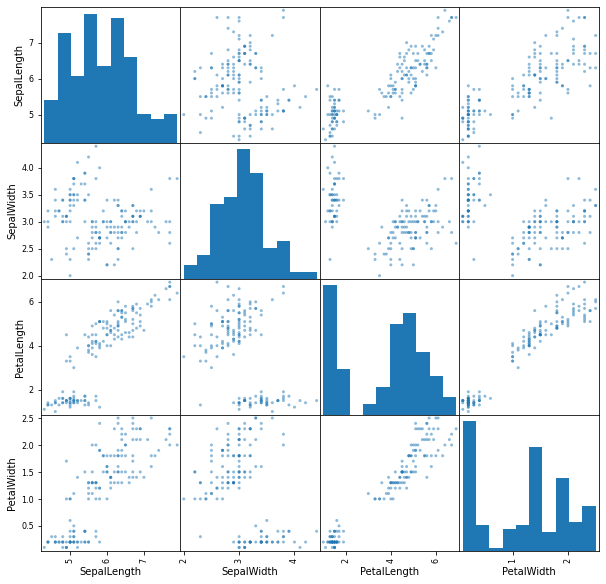

In [3]:
# Make scatter matrix
scat_plt = scatter_matrix(dataFrame, figsize=(10,10))

> Loop over different numbers of clusters

In [4]:
k = 10
BIC = np.zeros((k))
AIC = np.zeros((k))
# Investigate AIC + BIC
for k in range(1,k+1):
    # See https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
    #Notice the different extra parameters in the provided Gaussian Mixture function - they might be necessary.
    
    gaussMix = GaussianMixture(n_components = k, covariance_type  = "full", max_iter = 1000, reg_covar = 0.01)
    BIC[k-1] = gaussMix.fit(X).bic(X)
    AIC[k-1] = gaussMix.fit(X).aic(X)

> Plot BIC/AIC for different model orders

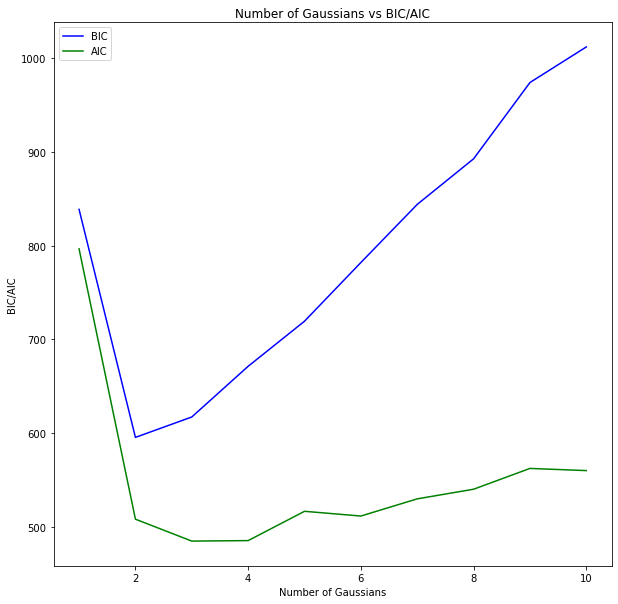

In [5]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,k+1),BIC, c='b', label="BIC")
plt.plot(np.arange(1,k+1),AIC, c='g', label="AIC")
plt.xlabel("Number of Gaussians")
plt.ylabel("BIC/AIC")
plt.legend()
plt.title("Number of Gaussians vs BIC/AIC")
plt.show()